# Apresentação:

    Relatório de apresentação dos dados para o trabalho de regressão. O
    objetivo desse relatório é apresentar a construção da ideia até
    cuminar no dataset escolhido.

In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
install.packages("ggplot2")
install.packages("ggcorrplot")

# Carregar os pacotes
library(ggplot2)
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




# Proposta inicial:

    A ideia inicial do trabalho seria checar a viabilidade de um modelo
    multimodal em comparação com um modelo único, ambos multinomiais. A
    ideia seria tentar predizer algo no ambito de segurança pública
    utilizando informações de outras áreas.

    Para esse propósito, alguns datasets foram coletados de bases de dados
    do Governo Federal(.gov) e do goverdo estadual (DataRio). Foi-se feita
    um tratamento prévio, não mostrado nesse relatório, para limpar os datasets
    de modo a deixa-los utilizaveis.

Fontes:

1. https://www.data.rio/search?groupIds=df4a8b5fe07b4d3b9f7338be54ec9d17
2. https://www.gov.br/mj/pt-br/assuntos/sua-seguranca/seguranca-publica/estatistica/dados-nacionais-1/base-de-dados-e-notas-metodologicas-dos-gestores-estaduais-sinesp-vde-2022-e-2023

    Feita a pesquisa no banco de dados públicos, toda a informação
    adquirida foi compilada em 10 datasets, todos relacionados
    à segurança pública mais por pespectivas diferentes.

In [ ]:
# Listando arquivos:
diretorio <- '/content/Datasets'

# Listando arquivos utilizandos:
arquivos <- list.files(path = diretorio, full.names = TRUE)

# Arquivos:
print(arquivos)

character(0)


    O problema é que, especificamente para um trabalho de regressão
    eles não seriam muito úteis. Escolhendo um exemplo.

In [ ]:
df = read.csv2('/content/roubo_rua.csv',sep=',')
df <- df %>%
  select(-Diferença.Absoluta2, -Diferença..2,-População3,-Taxa.por.100.mil.hab2);df

Warning message in file(file, "rt"):
“cannot open file '/content/roubo_rua.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


    Vemos um primeiro problema desse dataset, muito são uma série temporal.
    Sendo assim, o modelo de regressão trabalhado no curso não seria
    robusto o suficiente para lidar com esses dados. A minha questão aqui
    é se poderiamos transformar esses dados de modos que eles pudessem
    deixar de ser uma série temporal... Porém não sei se isso faz muito sentido.

In [ ]:
# Análise das colunas:
glimpse(df)

In [ ]:
# Correção da Tipologia dos Dados:
df$Nov <- as.numeric(df$Nov)
df$Dez <- as.numeric(df$Dez)

In [ ]:
# Analisando os dados:
summary(df)

    Uma outra questão é a auto-correlação entre os dados.

In [ ]:
# Matriz de correlação
correlation_matrix <- cor(df, use = "complete.obs")

# Plotar o heatmap de correlação
ggcorrplot(correlation_matrix,
           method = "circle",
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           colors = c("blue", "white", "red"),
           title = "Heatmap de Correlação",
           ggtheme = ggplot2::theme_minimal())

    Tendo em vista esses problemas, o que restou foi mudar
    o escopo dos dados para datasets mais condizentes com
    o objetivo do trabalho.

# Proposta final:

    A proposta aqui então foi escolher um dataset do kaggle,
    plataforma de competições na área de Machine Learning, mas
    adequado ao propósito do trabalho.

    Dos datasets estudados, um dos que respondeu bem foi um dataset
    relacionado a vendas de dispositivos celulares.

fonte: https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data

**CONTEXTO**

    O mercado de dispositivos usados e recondicionados cresceu
    consideravelmente na última década, pois oferece alternativas
    econômicas tanto para consumidores quanto para empresas que
    procuram economizar dinheiro ao adquirir um dispositivo. Maximizar
    a longevidade dos dispositivos por meio do comércio de segunda mão
    também reduz seu impacto ambiental e ajuda na reciclagem e redução
    de resíduos. Aqui está um conjunto de dados amostral de dados de
    preços normalizados de dispositivos usados, recondicionados e novos.

**OBJETIVO**

    O objetivo é realizar Análise Exploratória de Dados e aplicar
    Regressão Linear para criar um modelo que possa ajudar na
    precificação desses dispositivos.

**METADADOS**

* device_brand: Nome da marca de fabricação
* os: Sistema operacional no qual o dispositivo é executado
* screen_size: Tamanho da tela em cm
* 4g: Se 4G está disponível ou não
* 5g: Se 5G está disponível ou não
* front_camera_mp: Resolução da câmera frontal em megapixels
* back_camera_mp: Resolução da câmera traseira em megapixels
* internal_memory: Quantidade de memória interna (ROM) em GB
* ram: Quantidade de RAM em GB
* battery: Capacidade de energia da bateria do dispositivo em mAh
* weight: Peso do dispositivo em gramas
* release_year: Ano em que o modelo do dispositivo foi lançado
* days_used: Número de dias que o dispositivo usado/recondicionado foi usado
* normalized_new_price: Preço normalizado de um dispositivo novo do mesmo modelo
* normalized_used_price (TARGET): Preço normalizado do dispositivo usado/recondicionado

In [ ]:
# Importando biblioteca:
library(googledrive) # Necessário para acessar o drive:
drive_auth() # Acessando o drive:

## Aquisitando dados

    Como estou usando o google colab, para evitar encher a minha
    máquina com arquivos, eu fiz uma cópia do arquivo no google
    classroom no meu google drive e aqui eu baixo o arquivo do google
    drive para a área de arquivos do Colab.

    É possivel, através do Tydiverse do R, se conectar diretamente com
    o seu drive, assim como utilizando o python.

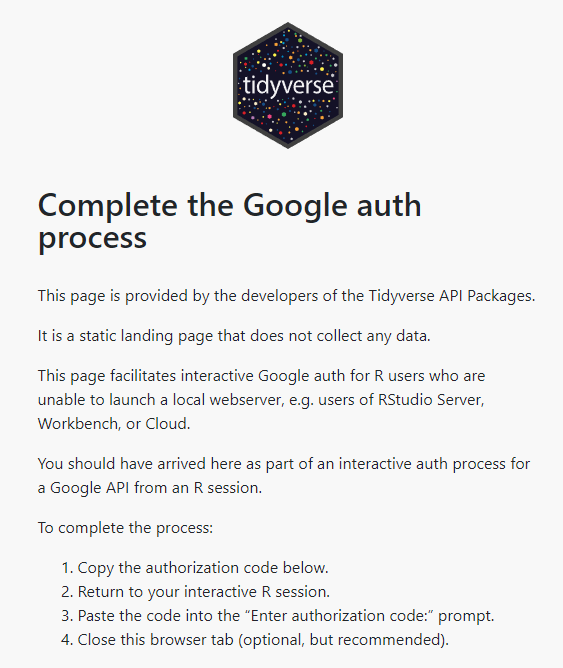    

Documentação: https://googledrive.tidyverse.org/

In [ ]:
# Encontrando o arquivo CSV no Google Drive
arquivo <- drive_find(type = "csv", pattern = "used_device_data")

# Baixando o arquivo para o ambiente de trabalho
drive_download(arquivo$id)

In [ ]:
# DataFrame:
df <- read.csv(arquivo$name);head(df)

In [ ]:
# Matriz de correlação
correlation_matrix <- cor(select(df,-device_brand, -os, -X4g, -X5g,-normalized_new_price), use = "complete.obs")

# Plotar o heatmap de correlação
ggcorrplot(correlation_matrix,
           method = "circle",
           type = "lower",
           lab = TRUE,
           lab_size = 3,
           colors = c("blue", "white", "red"),
           title = "Heatmap de Correlação",
           ggtheme = ggplot2::theme_minimal())

**Conclusão**

    Vemos que ainda há variáveis fortemente correlacionadas, mas
    já é um cenário mais plausível, ou seja tratável, para que
    a regressão linear normal seja suficientemente robusta.